In [1]:
from itertools import permutations

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from knowledge import CHKSUM_ADDR

%matplotlib notebook

In [2]:
chksum_addr_comb = set()

for addrs in CHKSUM_ADDR.values():
    chksum_addr_comb.update(addrs)

chksum_addr_comb = np.array(sorted(list(chksum_addr_comb)))

In [3]:
chksum_addr_comb

array([ 813696,  813698,  813699,  813702,  813706,  813707,  813711,
        823201,  823202,  823203,  823206,  823207,  823209,  823210,
        823211,  823212,  823213,  823214,  823215,  851712,  851713,
        851714,  851715,  851716,  851717,  851718,  851719,  851720,
        851721,  851722,  851723,  851724,  851725,  851726,  899232,
        899233,  899234,  899235,  899236,  899237,  899238,  899239,
        899240,  899241,  899242,  899243,  899245,  899246,  899247,
        956256,  956257,  956258,  956259,  956260,  956261,  956262,
        956263,  956264,  956265,  956266,  956267,  956268,  956269,
        956270,  956271,  984769,  984770,  984771,  984773,  984774,
        984775,  984777,  984778,  984779,  984780,  984781,  984782,
        984783, 1032288, 1032289, 1032290, 1032291, 1032294, 1032295,
       1032296, 1032297, 1032298, 1032299, 1032301, 1032302, 1032303,
       1041792, 1041793, 1041794, 1041795, 1041796, 1041798, 1041799,
       1041801, 1041

<IPython.core.display.Javascript object>


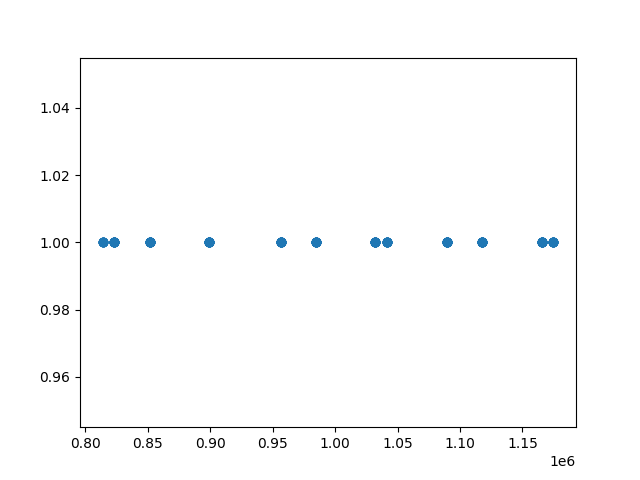

In [4]:
plt.figure()
plt.scatter(chksum_addr_comb, np.ones(len(chksum_addr_comb)))

In [5]:
X = chksum_addr_comb.reshape((-1, 1))

Ns = list(range(4, 20))
stds = []

for N in Ns:
    kmeans = KMeans(n_clusters=N, random_state=123).fit(X)
    
    std_tot = 0
    for i in range(0, N):
        std = np.std(X[kmeans.labels_ == i])
        std_tot += std

    stds.append(np.sqrt(std_tot))
    
stds = np.array(stds)

<IPython.core.display.Javascript object>


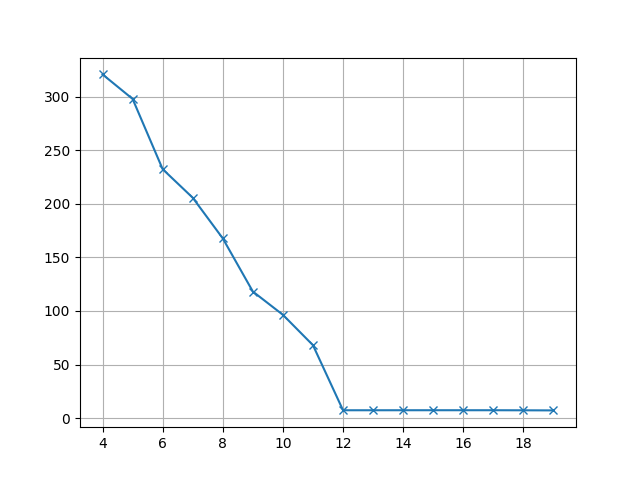

In [6]:
plt.figure()
plt.grid()
plt.plot(Ns, stds, 'x-')

In [7]:
opt_idx = np.where(stds < 8)[0][0]
N_opt = Ns[opt_idx]
print("N opt =", N_opt)

N opt = 12


In [8]:
kmeans = KMeans(n_clusters=N_opt, random_state=123).fit(X)
centers = np.sort(kmeans.cluster_centers_.reshape(-1))
np.diff(centers)

array([ 9508., 28515., 47512., 57028., 28510., 47523.,  9506., 47519.,
       28511., 47524.,  9497.])

In [9]:
full_blk_starts = []
non_full_blk_starts = []

for i in range(0, N_opt):
    addr = X[kmeans.labels_ == i].reshape(-1)
    # print(addr)
    min_ = np.min(addr)
    max_ = np.max(addr)
    print(min_, max_, max_-min_)
    if max_-min_ == 15:
        full_blk_starts.append(min_)
    else:
        non_full_blk_starts.append(min_)

full_blk_starts = np.array(sorted(full_blk_starts))
non_full_blk_starts = np.array(sorted(non_full_blk_starts))

1089312 1089327 15
851712 851726 14
984769 984783 14
1165344 1165359 15
1041792 1041804 12
899232 899247 15
823201 823215 14
956256 956271 15
1117825 1117839 14
1032288 1032303 15
1174848 1174860 12
813696 813711 15


In [10]:
gcds = set()

for perm in permutations(full_blk_starts, 2):
    # print(perm)
    gcd = np.gcd(*perm)
    gcds.add(gcd)

print("GCDs = ", gcds)
gcd_min = min(gcds)

GCDs =  {96, 672}


In [11]:
non_full_blk_starts_align = np.round(non_full_blk_starts / gcd_min) * gcd_min
non_full_blk_starts_align = non_full_blk_starts_align.astype(int)

In [12]:
chks_blocks = np.sort(np.concatenate((full_blk_starts, non_full_blk_starts_align)))
print("Checksum (16-bit) start addr:")
print(repr(chks_blocks))

Checksum (16-bit) start addr:
array([ 813696,  823200,  851712,  899232,  956256,  984768, 1032288,
       1041792, 1089312, 1117824, 1165344, 1174848])
